In [3]:
from PIL import Image
from scipy import misc
import pylab as plt
%matplotlib inline
import numpy as np
import skimage.transform
import pandas
import scipy.misc
import tensorflow 

from tensorflow import keras
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.utils import np_utils

In [4]:
def download_image(path):
    return misc.imread(path, mode='L')

def show_image(image):
    imgplot = plt.imshow(image, cmap='gray')
    plt.show()
    
def prepare_image(image, c=128):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if (image[i, j] < c):
                image[i, j] = 0
            else:
                image[i, j] = 1

def is_in_bounds(x, y, shape):
    return x > 0 and y > 0 and x < shape[0] and y < shape[1]
def is_ok(x, y, image):
    return  is_in_bounds(x, y, image.shape) and image[x, y] == 0 

turns = [[-1, -1], [-1, 0], [-1, 1], [0, -1], [0, 1], [1, -1], [1, 0], [1, 1]]

def dfs(cur_x, cur_y, image, used):
    for turn in turns:
        to_x = cur_x + turn[0]
        to_y = cur_y + turn[1]
        if (is_ok(to_x, to_y, image) and used[to_x, to_y] == 0):
            used[to_x, to_y] = used[cur_x, cur_y]
            dfs(to_x, to_y, image, used)

def divide_graph(image):
    used = np.zeros(image.shape)
    num = 0
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if (used[i, j] == 0 and image[i, j] == 0):
                num += 1
                used[i, j] = num
                dfs(i, j, image, used)
    return num, used

def find_bounds(used):
    min_bounds = np.zeros((num + 1, 2))
    max_bounds = np.zeros((num + 1, 2))
    for i in range(1, num + 1):
        min_bounds[i, 0] = 10000000
        min_bounds[i, 1] = 10000000
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            k = int(used[i, j])
            if (min_bounds[k, 0] > i):
                min_bounds[k, 0] = i
            if (min_bounds[k, 1] > j):
                min_bounds[k, 1] = j
            if (max_bounds[k, 0] < i):
                max_bounds[k, 0] = i
            if (max_bounds[k, 1] < j):
                max_bounds[k, 1] = j
    return min_bounds, max_bounds

def filter_graph(num, used, min_bounds, max_bounds):
    actual_num = 0
    min_size = 10
    for k in range(1, num + 1):
        if (max_bounds[k, 0] - min_bounds[k, 0] < min_size and max_bounds[k, 1] - min_bounds[k, 1] < min_size):
            for i in range(used.shape[0]):
                for j in range(used.shape[1]):
                   if (int(used[i, j]) == k):
                       used[i, j] = 0
        else:
            actual_num += 1
            min_bounds[actual_num] = min_bounds[k]
            max_bounds[actual_num] = max_bounds[k]
            for i in range(used.shape[0]):
                for j in range(used.shape[1]):
                   if (int(used[i, j]) == k):
                       used[i, j] = actual_num   
    return actual_num

def print_obj(used, id):
    img = np.zeros(used.shape)
    for i in range(used.shape[0]):
        for j in range(used.shape[1]):
            img[i, j] = 1
            if (int(used[i, j]) == id):
                img[i, j] = 0
    show_image(img)

def print_all(used, num):
    print(num)
    for i in range(num):
        print_obj(component, i + 1)

def mark_up_findings(image, num, used, min_bounds, max_bounds):
    marked_image = image.copy()
    color = 0
    shape = marked_image.shape
    for k in range(1, num + 1):
        min_x = int(min_bounds[k, 0])
        min_y = int(min_bounds[k, 1])
        max_x = int(max_bounds[k, 0])
        max_y = int(max_bounds[k, 1])
        for i in range(min_x, max_x):
            marked_image[i, min_y] = color
            marked_image[i, max_y] = color
            if (min_y > 0):
                marked_image[i, min_y - 1] = color
            if (max_y > 0):
                marked_image[i, max_y - 1] = color
            if (min_y < shape[1] - 1):
                marked_image[i, min_y + 1] = color
            if (max_y < shape[1] - 1):
                marked_image[i, max_y + 1] = color
        for i in range(min_y, max_y):
            marked_image[min_x, i] = color
            marked_image[max_x, i] = color
            if (min_x > 0):
                marked_image[min_x - 1, i] = color
            if (max_x > 0):
                marked_image[max_x - 1, i] = color
            if (min_x < shape[0] - 1):
                marked_image[min_x + 1, i] = color
            if (max_x < shape[0] - 1):
                marked_image[max_x + 1, i] = color
    show_image(marked_image)
    
def maximum(x, y):
    return x * (x >= y) + y * (x < y)

def minimum(x, y):
    return x * (x <= y) + y * (x > y)

def crop_image(image):
    size = 28
    times = 1.3
    
    cur_size = max(image.shape)
    
    tmp = np.ones((cur_size, cur_size))
    dx = (cur_size - image.shape[0]) // 2
    dy = (cur_size - image.shape[1]) // 2
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            tmp[i + dx, j + dy] = image[i, j]
    show_image(image)      
    image = tmp
    show_image(image)
    
    while (image.shape[0] < size * times) and (image.shape[1] < size * times):
        image = skimage.transform.resize(image, (int(image.shape[0] * times), int(image.shape[1] * times)))
                                         
    while (image.shape[0] > size) or (image.shape[1] > size):
        image = skimage.transform.resize(image, (int(image.shape[0] / times), int(image.shape[1] / times)))
                                         
    if (image.shape[0] <= size and image.shape[1] <= size):
        field_x = (size - image.shape[0]) // 2
        field_y = (size - image.shape[1]) // 2
        new_image = np.ones((size, size))
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                new_image[i + field_x, j + field_y] = image[i, j]
        show_image(new_image)
        return new_image
    new_image = skimage.transform.resize(image, (size, size))
    #new_image *= 255
    #prepare_image(new_image, 120)
    #new_image /= 255
    return new_image
    '''
    while not (image.shape[0] <= 28 and image.shape[1] <= 28):
        image = skimage.transform.resize(image, (image.shape[0] // 2, image.shape[1] // 2))
    new_image = np.ones((size, size))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i + (28 - image.shape[0]) // 2, j + (28 - image.shape[1]) // 2] = image[i, j]
    
    #new_image *= 255
    #prepare_image(new_image, 200)
    #new_image /= 255
    return new_image'''

def crop_findings(image, num, used, min_bounds, max_bounds):
    symbols = list()
    for k in range(1, num + 1):
        field = int(max_bounds[k, 0] + max_bounds[k, 1] - min_bounds[k, 0] - min_bounds[k, 1]) // 10
        print(field)
        min_x = int(min_bounds[k, 0]) - field
        min_y = int(min_bounds[k, 1]) - field
        max_x = int(max_bounds[k, 0]) + field
        max_y = int(max_bounds[k, 1]) + field
        new_image = np.ones((max_x - min_x, max_y - min_y))
        for i in range(maximum(0, min_x), minimum(image.shape[0], max_x)):
            for j in range(maximum(0, min_y), minimum(image.shape[1], max_y)):
                if (int(used[i, j]) == k):
                    new_image[i - min_x, j - min_y] = 0
        symbols.append(crop_image(new_image))
    return symbols

In [5]:
alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
def predict_letter(image, model):
    size = 28
    new_data = 1 - image.reshape((28 * 28, 1))
    pred = model.predict(new_data.T)
    #print(pred)
    maximum = -1
    number = -1
    for i in range(len(pred[0])):
        if pred[0, i] > maximum:
            maximum = pred[0, i]
            number = i
    return alphabet[number]

def predict_number(image, model):
    size = 28
    new_data = 1 - image.reshape((28 * 28, 1))
    pred = model.predict(new_data.T)
    #print(pred)
    maximum = -1
    number = -1
    for i in range(len(pred[0])):
        if pred[0, i] > maximum:
            maximum = pred[0, i]
            number = i
    return number

def predict_number_or_letter(image, model_d, model_l):
    size = 28
    new_data = 1 - image.reshape((28 * 28, 1))
    pred = model_d.predict(new_data.T)
    maximum = -1
    number = -1
    for i in range(len(pred[0])):
        if pred[0, i] / 10 > maximum:
            maximum = pred[0, i] / 10
            number = i
    answer = number
    pred = model_l.predict(new_data.T)
    flag = False
    for i in range(len(pred[0])):
        if pred[0, i] / 26 > maximum:
            maximum = pred[0, i] / 26
            number = i
            flag = True
    if flag:
        answer = alphabet[number]
    return answer

In [6]:
def load_data(path):
    trainAll = pandas.read_csv(path + "/emnist-letters-train.csv")
    trainLetters = trainAll.values[:,1:785]
    trainLabels = trainAll.values[:,0:1]
    testAll = pandas.read_csv(path + "/emnist-letters-test.csv")
    testLetters = testAll.values[:,1:785]
    testLabels = testAll.values[:,0:1]
    
    X_train = np.zeros(trainLetters.shape)
    for i in range(trainLetters.shape[0]):
        X_train[i] = (trainLetters[i].reshape(28, 28).T / 255).reshape(28 * 28)
    y_train = trainAll.values[:,0:1] - 1

    X_test = np.zeros(testLetters.shape)
    for i in range(testLetters.shape[0]):
        X_test[i] = (testLetters[i].reshape(28, 28).T / 255).reshape(28 * 28)
    y_test = testAll.values[:,0:1] - 1
    return X_train, y_train, X_test, y_test

def learn_EMNIST_model(X_train, y_train, X_test, y_test):
    batch_size = 128
    num_epochs = 20
    hidden_size = 512 * 2

    num_train = X_train.shape[0]
    num_test = X_test.shape[0]

    height, width, depth = 28, 28, 1
    num_classes = 26

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255

    Y_train = np_utils.to_categorical(y_train, num_classes)
    Y_test = np_utils.to_categorical(y_test, num_classes)

    inp = Input(shape=(height * width,))
    hidden_1 = Dense(hidden_size, activation='relu')(inp)
    hidden_2 = Dense(hidden_size, activation='relu')(hidden_1)
    out = Dense(num_classes, activation='softmax')(hidden_2)
    model = Model(inp, out)
    model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

    model.fit(X_train, Y_train, # Train the model using the training set...
              batch_size=batch_size, nb_epoch=num_epochs,
              verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation
    model.evaluate(X_test, Y_test, verbose=1) # Evaluate the trained model on the test set!
    return model

In [7]:
def learn_MNIST_model():
    batch_size = 128
    num_epochs = 20
    hidden_size = 512

    num_train = 60000
    num_test = 10000

    height, width, depth = 28, 28, 1
    num_classes = 10

    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    X_train = X_train.reshape(num_train, height * width)
    X_test = X_test.reshape(num_test, height * width)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    X_train = X_train
    X_test = X_test

    Y_train = np_utils.to_categorical(y_train, num_classes)
    Y_test = np_utils.to_categorical(y_test, num_classes)

    inp = Input(shape=(height * width,))
    hidden_1 = Dense(hidden_size, activation='relu')(inp)
    hidden_2 = Dense(hidden_size, activation='relu')(hidden_1)
    out = Dense(num_classes, activation='softmax')(hidden_2)

    model = Model(inp, out)

    model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
                  optimizer='adam', # using the Adam optimiser
                  metrics=['accuracy']) # reporting the accuracy

    model.fit(X_train, Y_train, # Train the model using the training set...
              batch_size=batch_size, nb_epoch=num_epochs,
              verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation
    model.evaluate(X_test, Y_test, verbose=1) # Evaluate the trained model on the test set!
    return model

In [7]:
X_train, y_train, X_test, y_test = load_data("/Users/yack_domnicky/EMNIST_data")
EMNIST_model = learn_EMNIST_model(X_train, y_train, X_test, y_test)

Train on 79919 samples, validate on 8880 samples
Epoch 1/20
79919/79919 [==============================] - 11s 141us/step - loss: 1.6367 - acc: 0.5134 - val_loss: 1.1722 - val_acc: 0.6553
Epoch 2/20
79919/79919 [==============================] - 11s 141us/step - loss: 0.9609 - acc: 0.7121 - val_loss: 0.8053 - val_acc: 0.7694
Epoch 3/20
79919/79919 [==============================] - 11s 139us/step - loss: 0.6877 - acc: 0.7937 - val_loss: 0.6226 - val_acc: 0.8231
Epoch 4/20
79919/79919 [==============================] - 11s 143us/step - loss: 0.5471 - acc: 0.8330 - val_loss: 0.5394 - val_acc: 0.8378
Epoch 5/20
79919/79919 [==============================] - 12s 144us/step - loss: 0.4657 - acc: 0.8571 - val_loss: 0.4716 - val_acc: 0.8598
Epoch 6/20
79919/79919 [==============================] - 12s 149us/step - loss: 0.4089 - acc: 0.8734 - val_loss: 0.4170 - val_acc: 0.8762
Epoch 7/20
79919/79919 [==============================] - 11s 144us/step - loss: 0.3666 - acc: 0.8847 - val_loss: 0.3

In [8]:
MNIST_model = learn_MNIST_model()

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 3s 59us/step - loss: 0.2363 - acc: 0.9287 - val_loss: 0.1009 - val_acc: 0.9703
Epoch 2/20
54000/54000 [==============================] - 3s 49us/step - loss: 0.0855 - acc: 0.9735 - val_loss: 0.0770 - val_acc: 0.9793
Epoch 3/20
54000/54000 [==============================] - 3s 54us/step - loss: 0.0536 - acc: 0.9826 - val_loss: 0.0665 - val_acc: 0.9785
Epoch 4/20
54000/54000 [==============================] - 3s 48us/step - loss: 0.0368 - acc: 0.9886 - val_loss: 0.0796 - val_acc: 0.9773
Epoch 5/20
54000/54000 [==============================] - 3s 50us/step - loss: 0.0283 - acc: 0.9909 - val_loss: 0.1020 - val_acc: 0.9710
Epoch 6/20
54000/54000 [==============================] - 3s 50us/step - loss: 0.0212 - acc: 0.9929 - val_loss: 0.0738 - val_acc: 0.9802
Epoch 7/20
54000/54000 [==============================] - 3s 52us/step - loss: 0.0196 - acc: 0.9932 - val_loss: 0.0777 - val_acc:

/Users/yack_domnicky/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


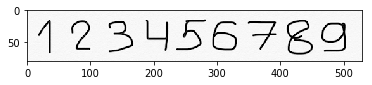

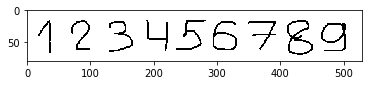

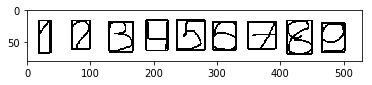

8


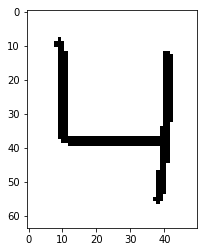

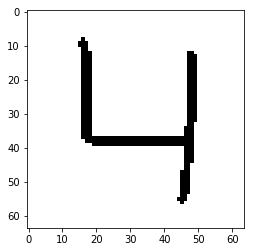

/Users/yack_domnicky/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/yack_domnicky/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


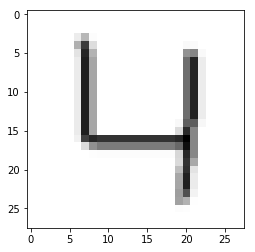

9


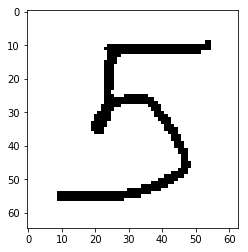

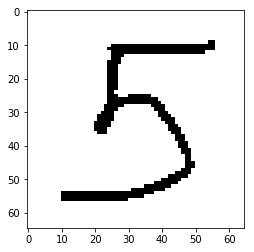

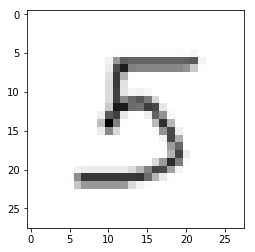

7


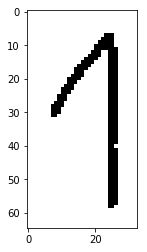

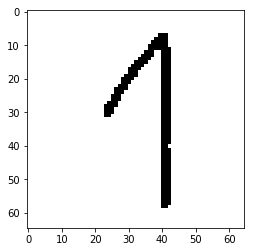

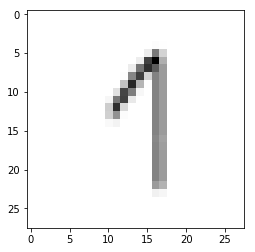

7


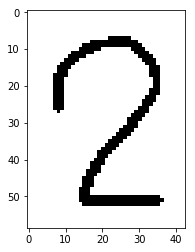

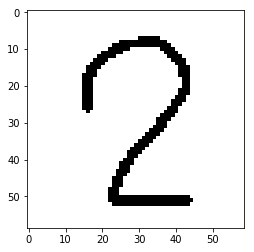

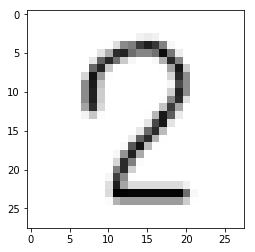

9


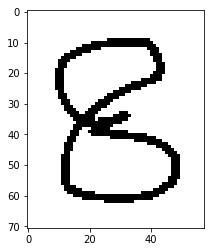

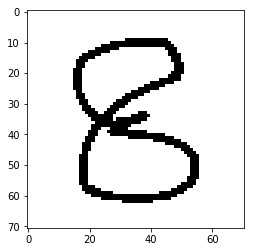

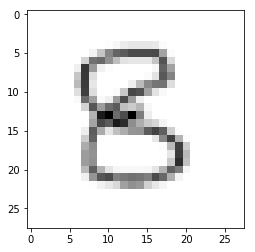

8


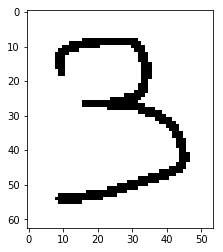

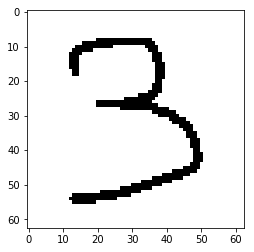

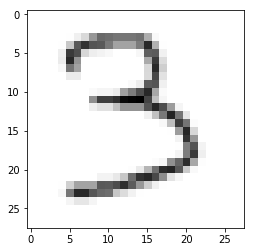

8


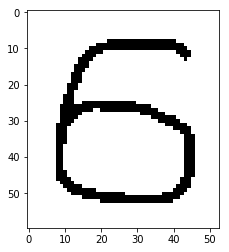

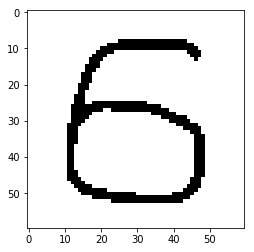

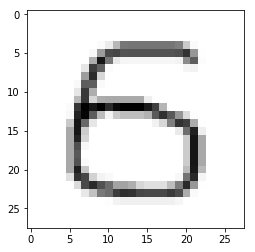

8


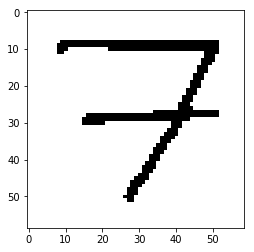

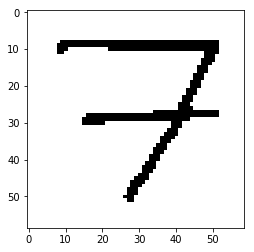

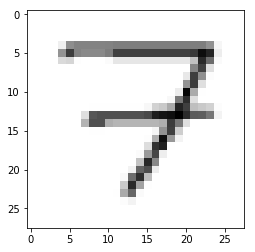

8


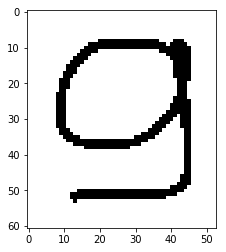

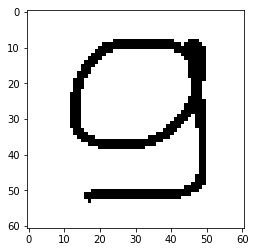

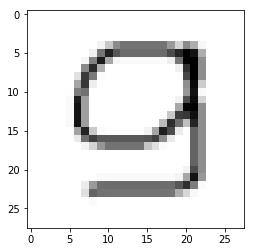

In [16]:
from keras.models import load_model
import h5py
model3 = keras.models.load_model('Symbols_Fraiming/model.h5')
img = download_image('Symbols_Fraiming/eleven.jpg')
show_image(img)
prepare_image(img)
show_image(img)
num, component = divide_graph(img)
min_bounds, max_bounds = find_bounds(component)
num = filter_graph(num, component, min_bounds, max_bounds)
#print_all(component, num)
mark_up_findings(img, num, component, min_bounds, max_bounds)
symbols = crop_findings(img, num, component, min_bounds, max_bounds)

E
4


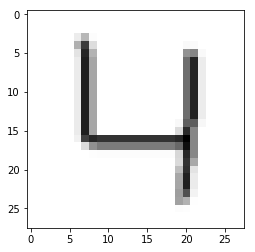

F
5


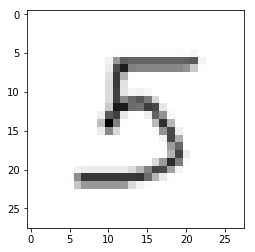

B
1


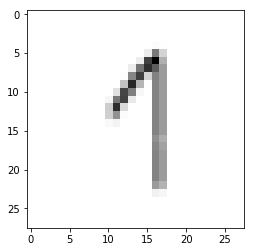

C
2


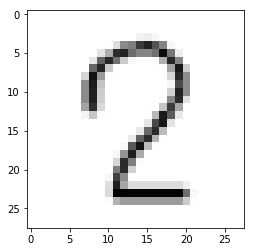

I
8


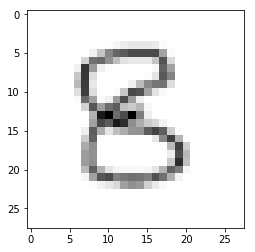

D
3


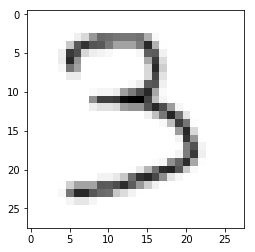

F
5


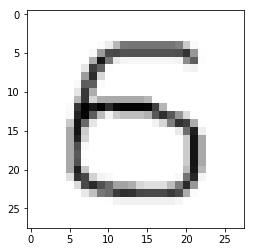

H
7


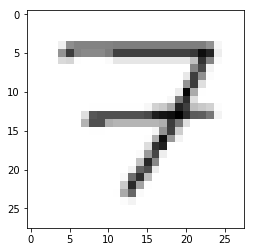

J
9


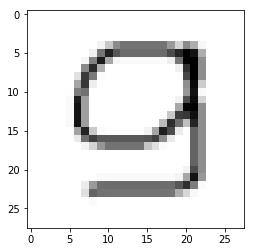

In [13]:
for symbol in symbols:
    print(predict_letter(symbol, model3))#EMNIST_model))
    print(predict_number(symbol, model3))#MNIST_model))
    #print(predict_number_or_letter(symbol, MNIST_model, EMNIST_model))
    show_image(symbol)

In [14]:
string = list()
for i in range(0, num):
    string.append((min_bounds[i + 1, 1], min_bounds[i + 1, 0], symbols[i]))
string.sort()

B
1


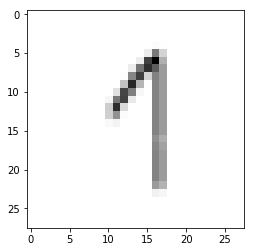

C
2


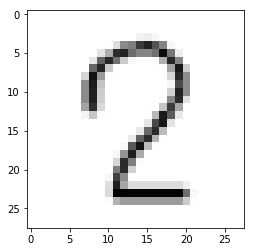

D
3


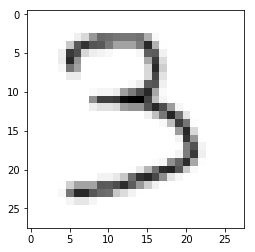

E
4


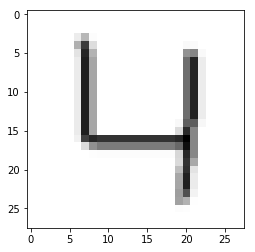

F
5


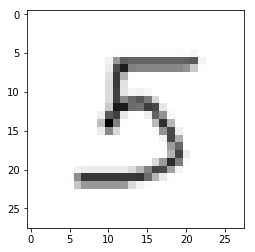

F
5


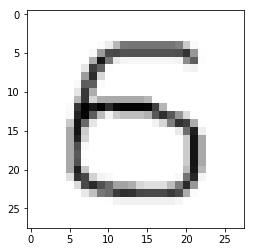

H
7


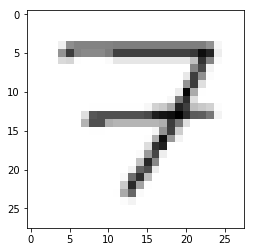

I
8


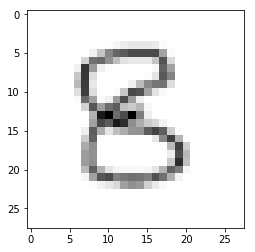

J
9


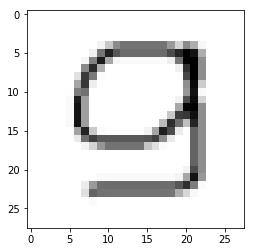

In [15]:
for i in range(num):
    symbol = string[i][2]
    print(predict_letter(symbol, model3))#EMNIST_model))
    print(predict_number(symbol, model3))#MNIST_model))
    #print(predict_number_or_letter(symbol, MNIST_model, EMNIST_model))
    show_image(symbol)